<a href="https://colab.research.google.com/github/brunobro/deteccao-de-picos-e-vales-em-series-temporais/blob/main/MI_Deteccao_de_Picos_Vales_Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de picos e vales em séries temporais**

Os picos/vales (pontos de máximo/mínimo locais) representam mudanças bruscas dos valores de uma série temporal. São pontos de inflexão.

Detectar esses picos/vales automaticamente é importante para diversas finalidades.

Exemplos:

* Antecipação de quedas de títulos do mercado financeiro (usando aprendizado de máquina)
* Verificação de anomalias (outliers)
* Estimativas de taxas (sinais biomédicos - ECG)
* Verificação de quedas/aumento de demandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#https://erdogant.github.io/findpeaks/pages/html/index.html
!pip install findpeaks

from findpeaks import findpeaks

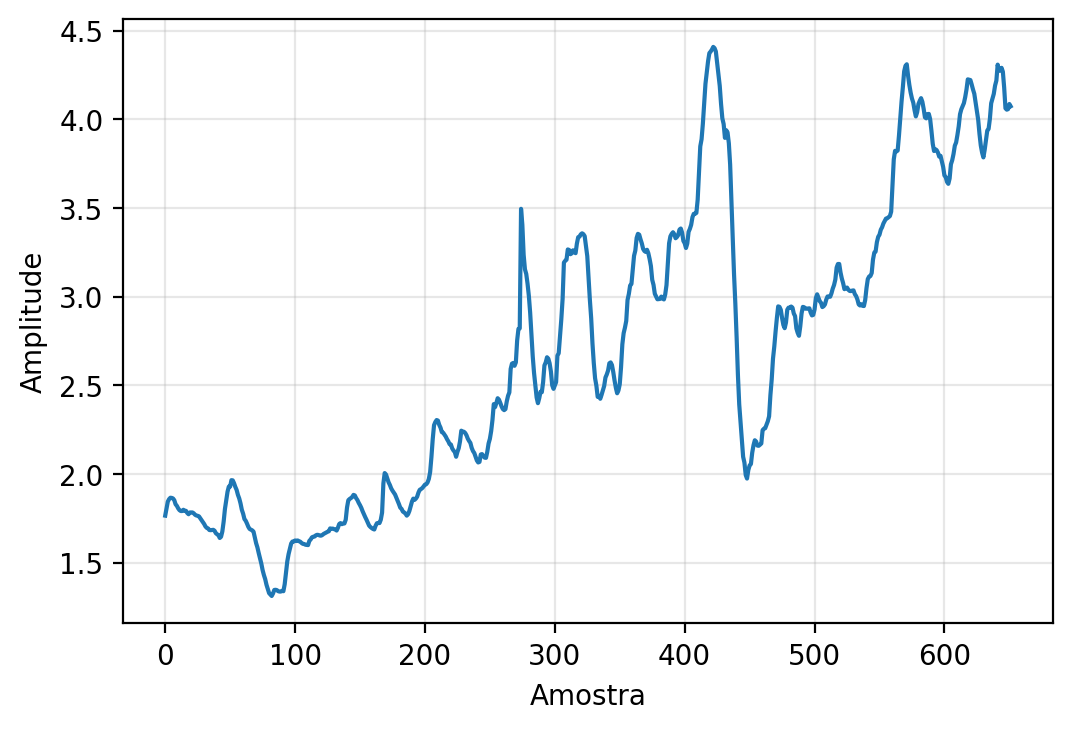

In [ ]:
'''
Série temporal de valor da gasolina
'''

serie = np.genfromtxt('Gasoline.csv', delimiter=',')[1:,1]

plt.figure(dpi=200)
plt.grid(alpha=0.3)
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.plot(serie)
plt.show()

**Detecção dos picos e vales**

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


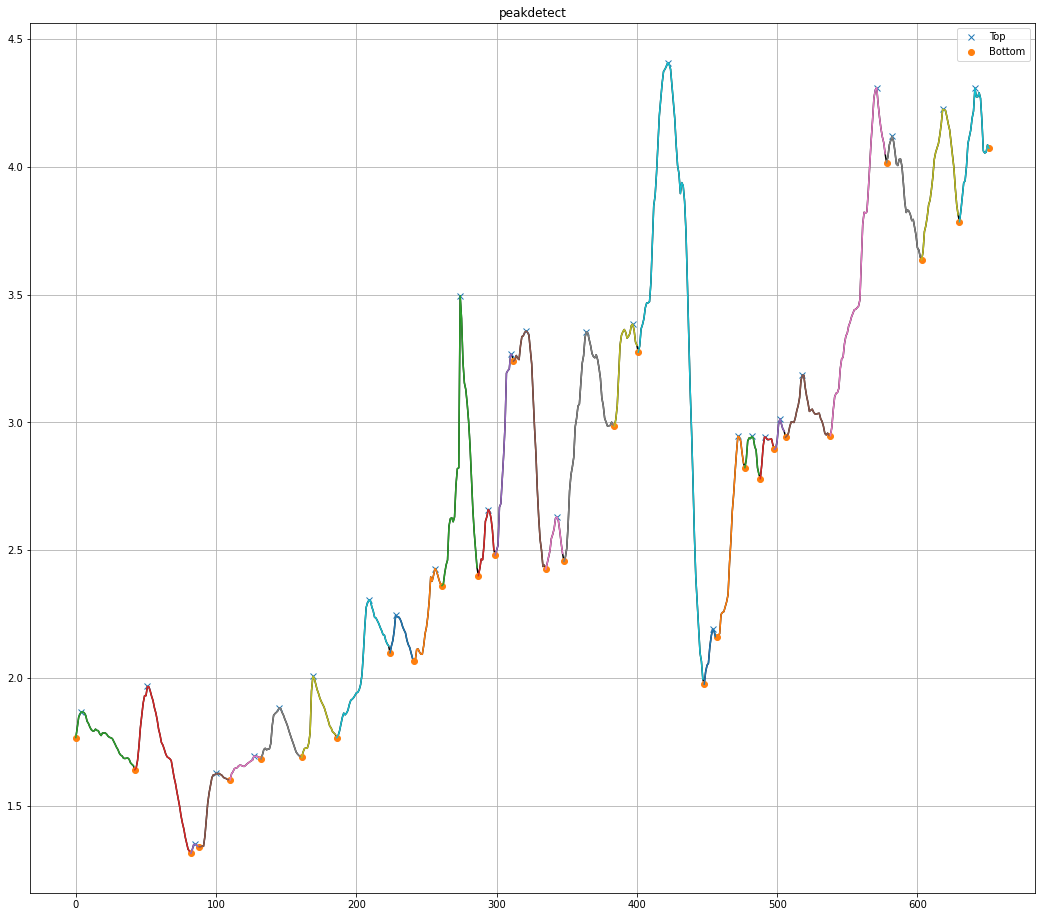

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f20521bd650>)

In [ ]:
fp = findpeaks(method='peakdetect', lookahead=5)
results = fp.fit(serie)
fp.plot(figsize=(18,16))

**Entendendo os resultados**

In [ ]:
results['df']

,x,y,labx,valley,peak
0,0,1.766,1.0,True,False
1,1,1.804,1.0,False,False
2,2,1.845,1.0,False,False
3,3,1.859,1.0,False,False
4,4,1.867,1.0,False,True
...,...,...,...,...,...
647,647,4.063,28.0,False,False
648,648,4.055,28.0,False,False
649,649,4.058,28.0,False,False
650,650,4.087,28.0,False,False


**Gráfico personalisado**

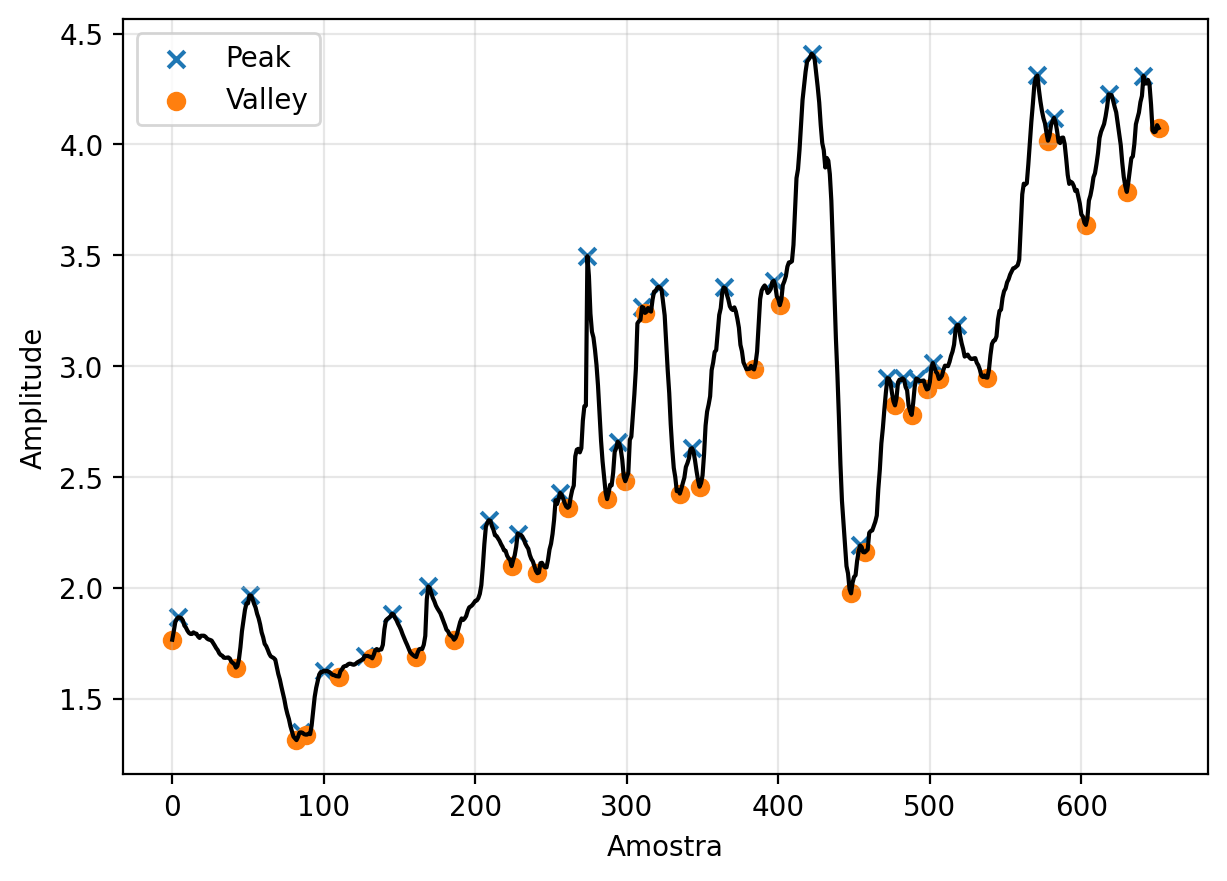

In [ ]:
def plot_pv(results):
    #retorna os picos e vales apenas
    peak   = results['df'][results['df']['peak'] == True]
    valley = results['df'][results['df']['valley'] == True]

    #Mostra o gráfico
    plt.figure(dpi=200, figsize=(7,5))
    plt.grid(alpha=0.3)
    plt.plot(results['df']['x'], results['df']['y'], color='k')
    plt.scatter(peak['x'], peak['y'], label='Peak', marker='x')
    plt.scatter(valley['x'], valley['y'], label='Valley', marker='o')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    return peak, valley

#Chama a função com os resultados obtidos anteriormente
peak, valley = plot_pv(results)

**Detecção dos picos/vales da série de temperatura do ar**

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


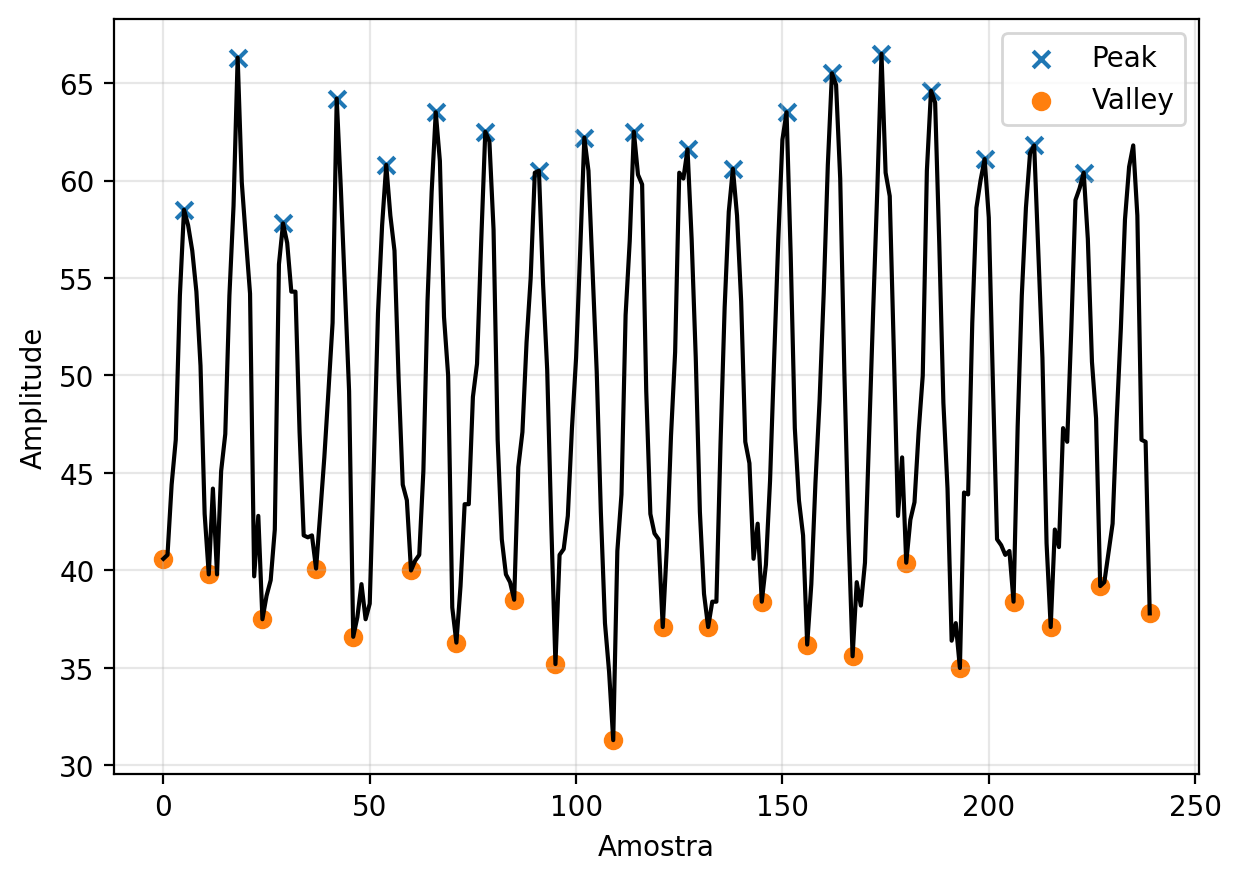

In [ ]:
'''
Série temporal de temperatura do ar
'''

#Carrega os dados da série
serie = np.genfromtxt('AirTemp.csv', delimiter=',')[1:,2]

#encontra os picos/vales
fp = findpeaks(method='peakdetect', lookahead=5)
results = fp.fit(serie)

#plota utilizando a função definida antes
peak, valley = plot_pv(results)

**Calculando as distâncias entre picos/vales**

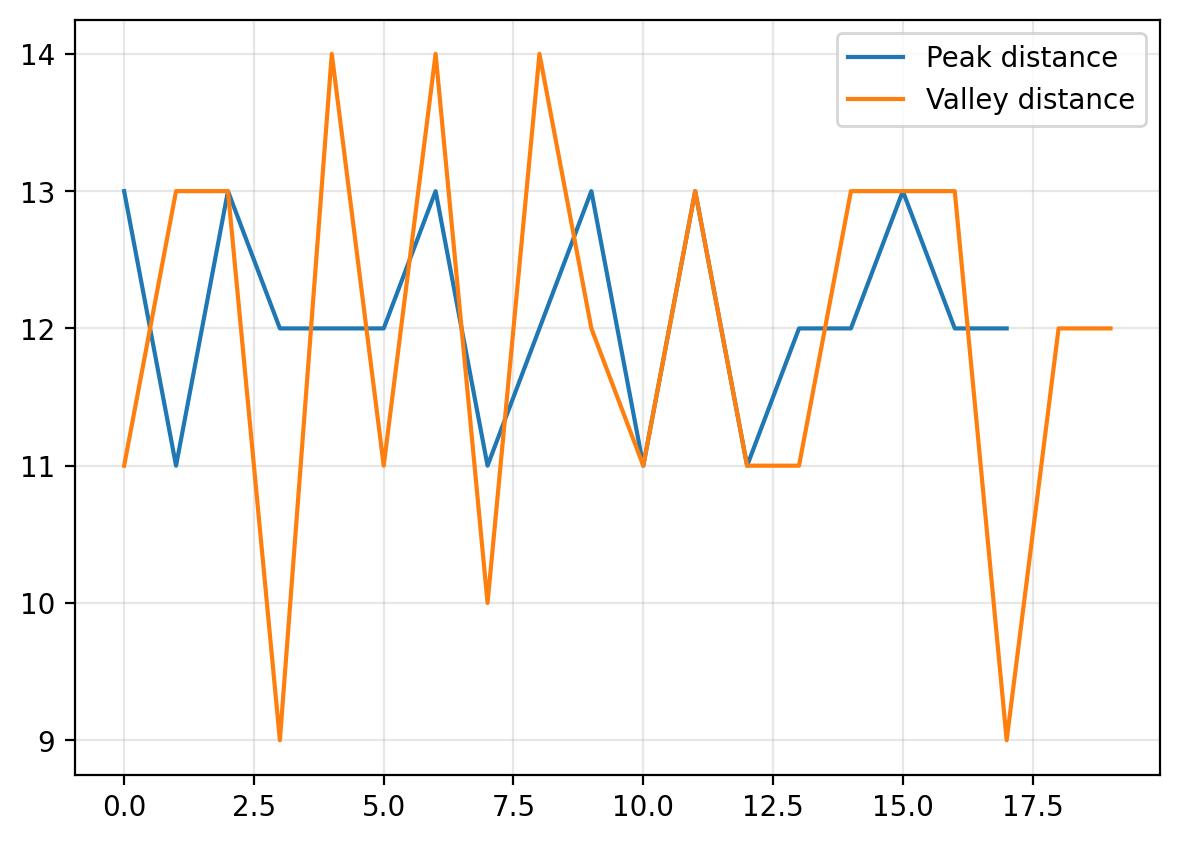

In [ ]:
#Calcula as distâncias, eixo-x
dist_peaks  = np.diff(peak['x'])
dist_valley = np.diff(valley['x'])

#mostra um gráfico destas diustâncias
plt.figure(dpi=200, figsize=(7,5))
plt.grid(alpha=0.3)
plt.plot(dist_peaks, label='Peak distance')
plt.plot(dist_valley, label='Valley distance')
plt.legend()
plt.show()